In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting
from sklearn.cluster import AgglomerativeClustering

In [7]:
data = pd.read_excel("/content/EastWestAirlines1.xlsx")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
data.shape

(3999, 12)

In [12]:
# Normalization / Standardisation function
from sklearn.preprocessing import StandardScaler  # built in function for standardization
scaler = StandardScaler() # scaler is an object name of StandardScalar class, you can give any name
df = scaler.fit_transform(data.iloc[:,2:]) # fit_transform() is a method of StandardScalar class
df # see the result

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

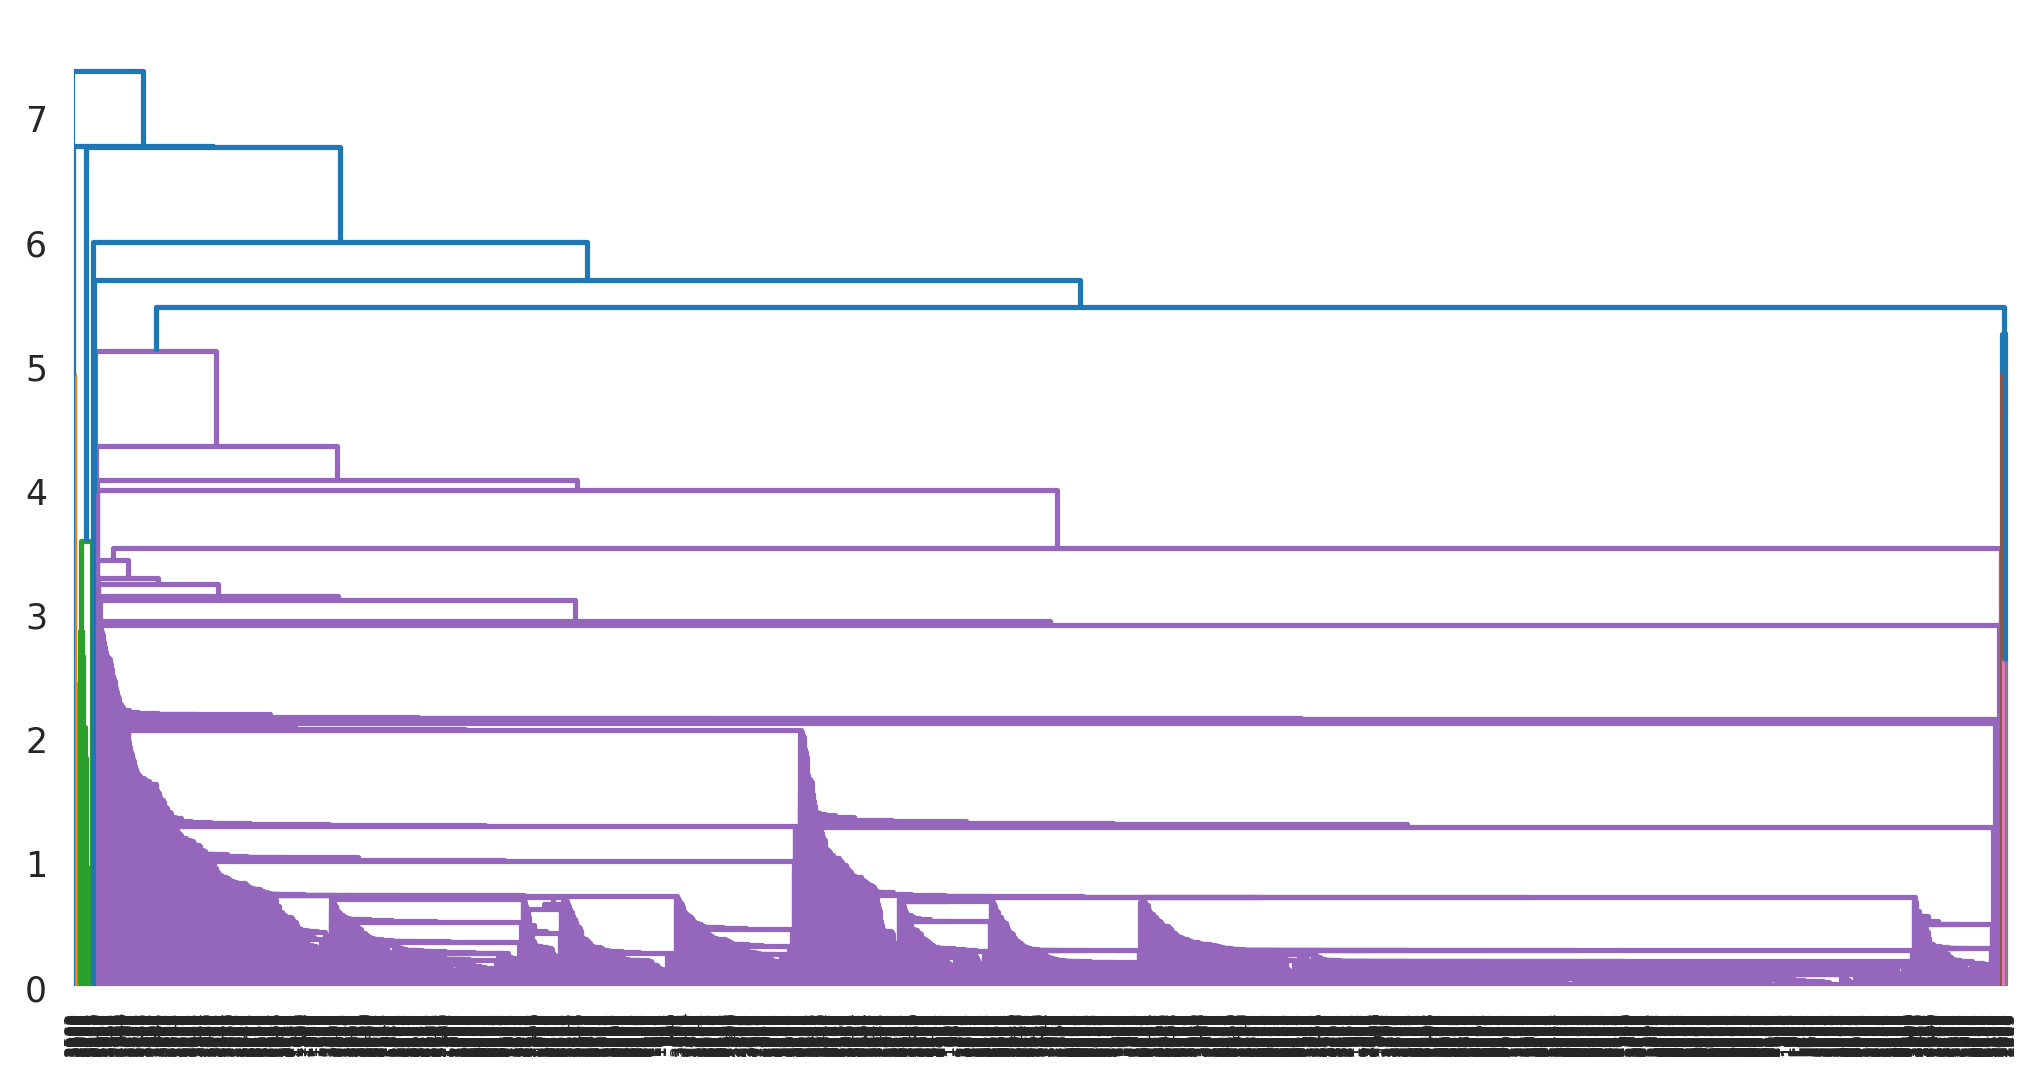

In [13]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='single')) # single linkage

In [14]:
# create clusters, suppose got input from customer that go for 4 clusters
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean',linkage = 'single')
hc

AgglomerativeClustering(linkage='single', metric='euclidean', n_clusters=4)

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(df) # apply fit_predict method on dataset df_norm. We will get cluster nos. in y_hc
Clusters=pd.DataFrame(y_hc,columns=['Cluster_No']) # append those no. of cluster numbers create dataframe

In [16]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
Clusters # Data point 0 belongs to 0th cluster, Data point 1 belongs to 3rd cluster

,Cluster_No
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [18]:
# Now let us map this cluster membership to the data points
data['h_clusterid'] = Clusters

In [19]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


#K-Means


In [21]:
from sklearn.cluster import KMeans

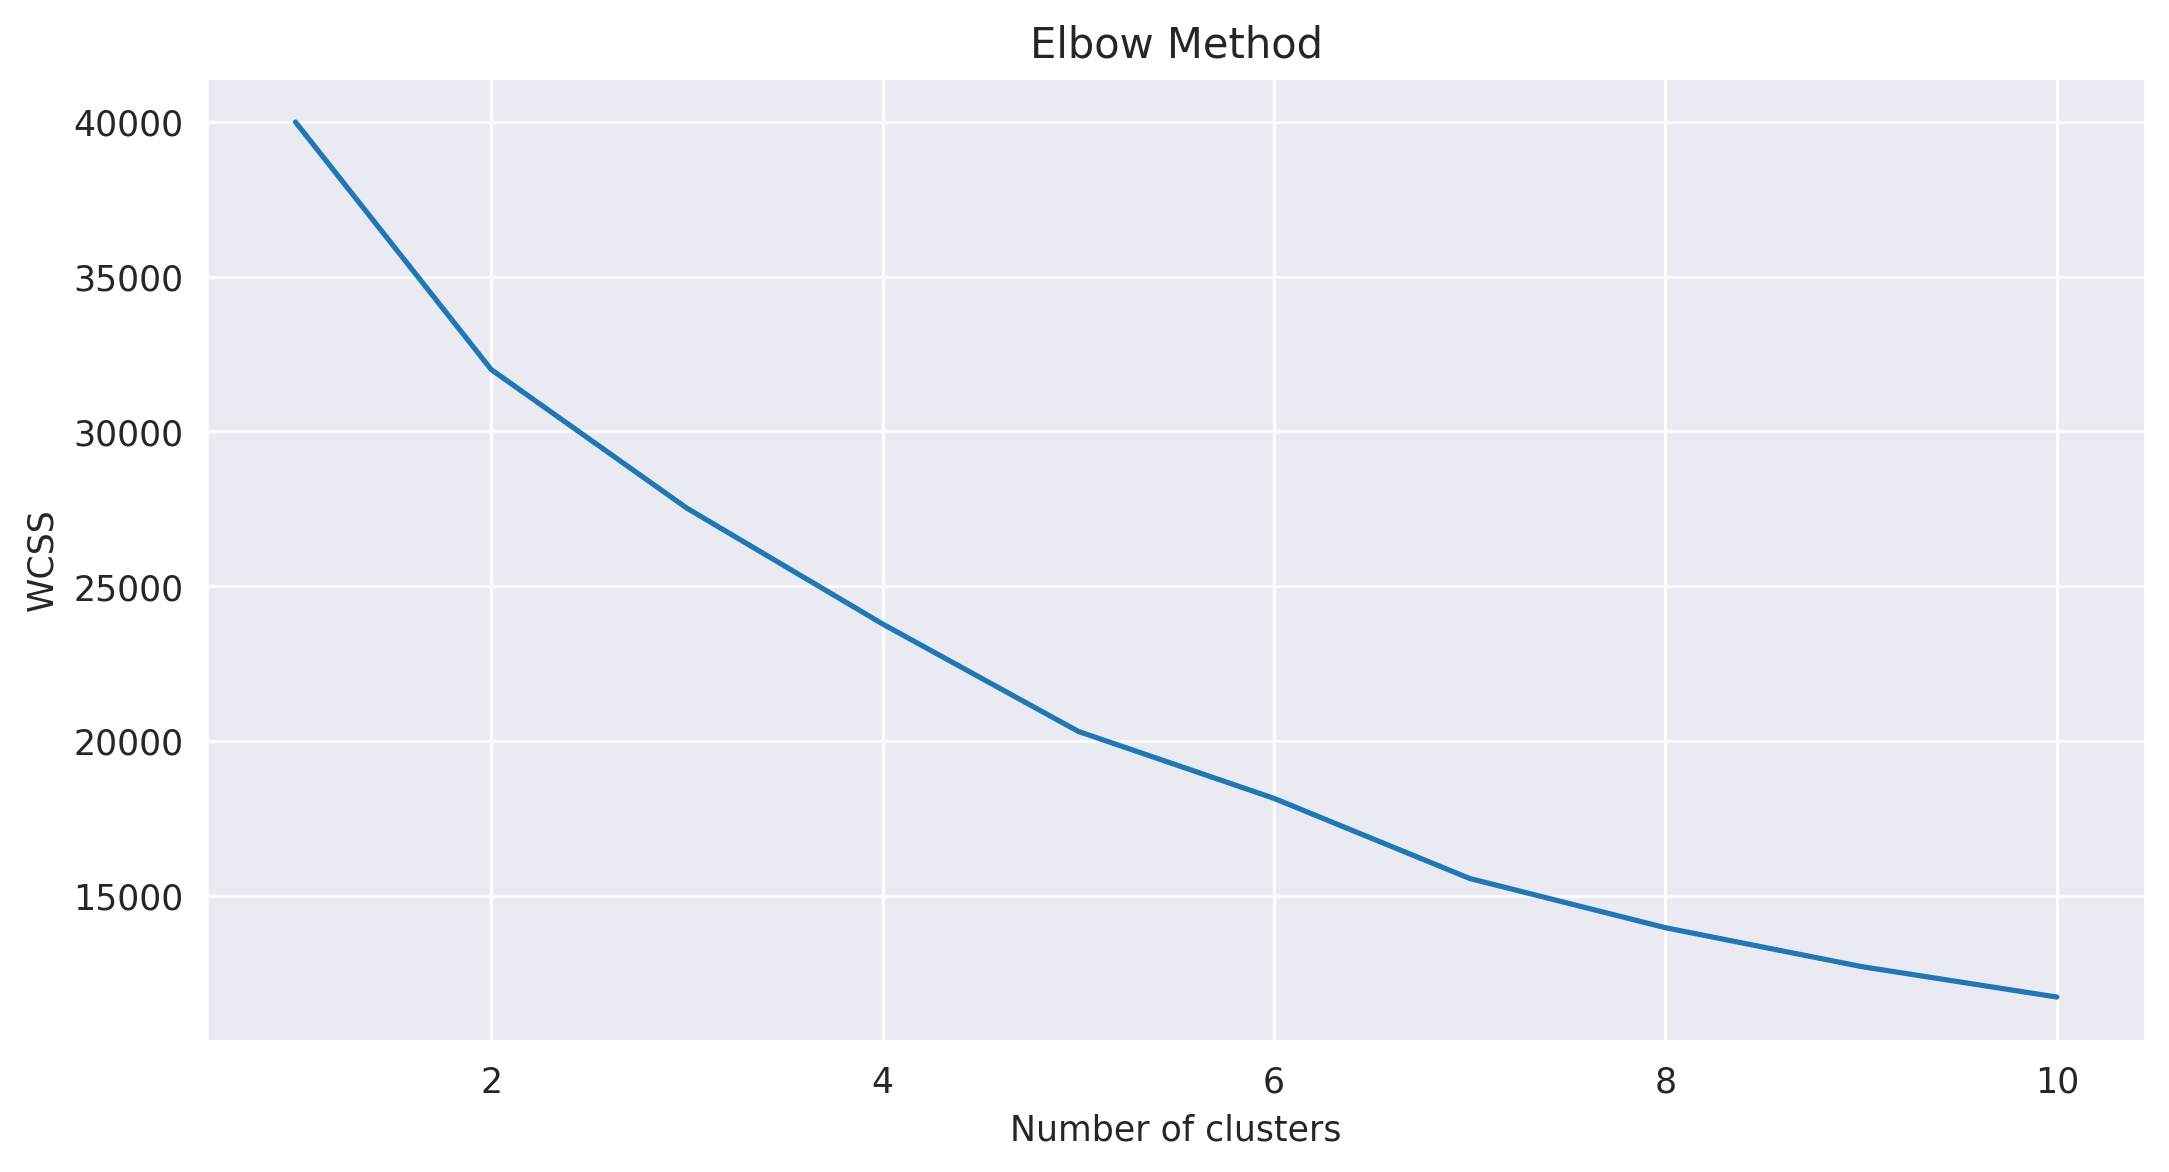

In [22]:
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.
    # In WCSS list we will append all distances i.e if cluster is 10 what is the value,
    # if 9 what is value and so on upto 1.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
wcss

[39990.00000000009,
 31994.059340796557,
 27514.833511237117,
 23772.834317878373,
 20301.917837277164,
 18139.1762333704,
 15550.237654624138,
 13959.671778012455,
 12705.705972443204,
 11719.505813642507]

In [24]:
kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
predict=kmeans.fit_predict(df)# assign cluster numbers to universities

In [25]:
predict

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [27]:
clusters_new = KMeans(n_clusters=3, random_state=0)
new_predict=clusters_new.fit_predict(df)

In [28]:
new_predict

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [32]:
#Assign clusters to the data set
data['kmeans'] = new_predict

In [33]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1,1


In [34]:
#Univ.groupby('clusterid_new').agg(['mean']).reset_index()
data.groupby('kmeans').mean('numeric_only')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
kmeans,,,,,,,,,,,,,,
0,1753.337278,166423.142012,728.751479,2.142012,1.047337,1.011834,31131.585799,26.964497,5363.485207,15.633136,4648.201183,0.804734,0.065089,0.0
1,2221.242041,48616.705025,105.523974,1.246260,1.018028,1.000384,4983.667434,7.097814,205.504028,0.634446,3733.055236,0.204833,0.018028,1.0
2,1610.932952,114033.072772,145.587899,3.781684,1.002453,1.037612,41135.389207,19.080131,325.089943,0.978741,4867.128373,0.663123,0.002453,2.0


#DBSCAN


In [35]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1,1


In [36]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,kmeans
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343,0.015254,1.263566,1.263566
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957,0.155014,0.527911,0.527911
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000,0.000000,1.000000,1.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000,0.000000,1.000000,1.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000,0.000000,2.000000,2.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000,3.000000,2.000000,2.000000


<Axes: >

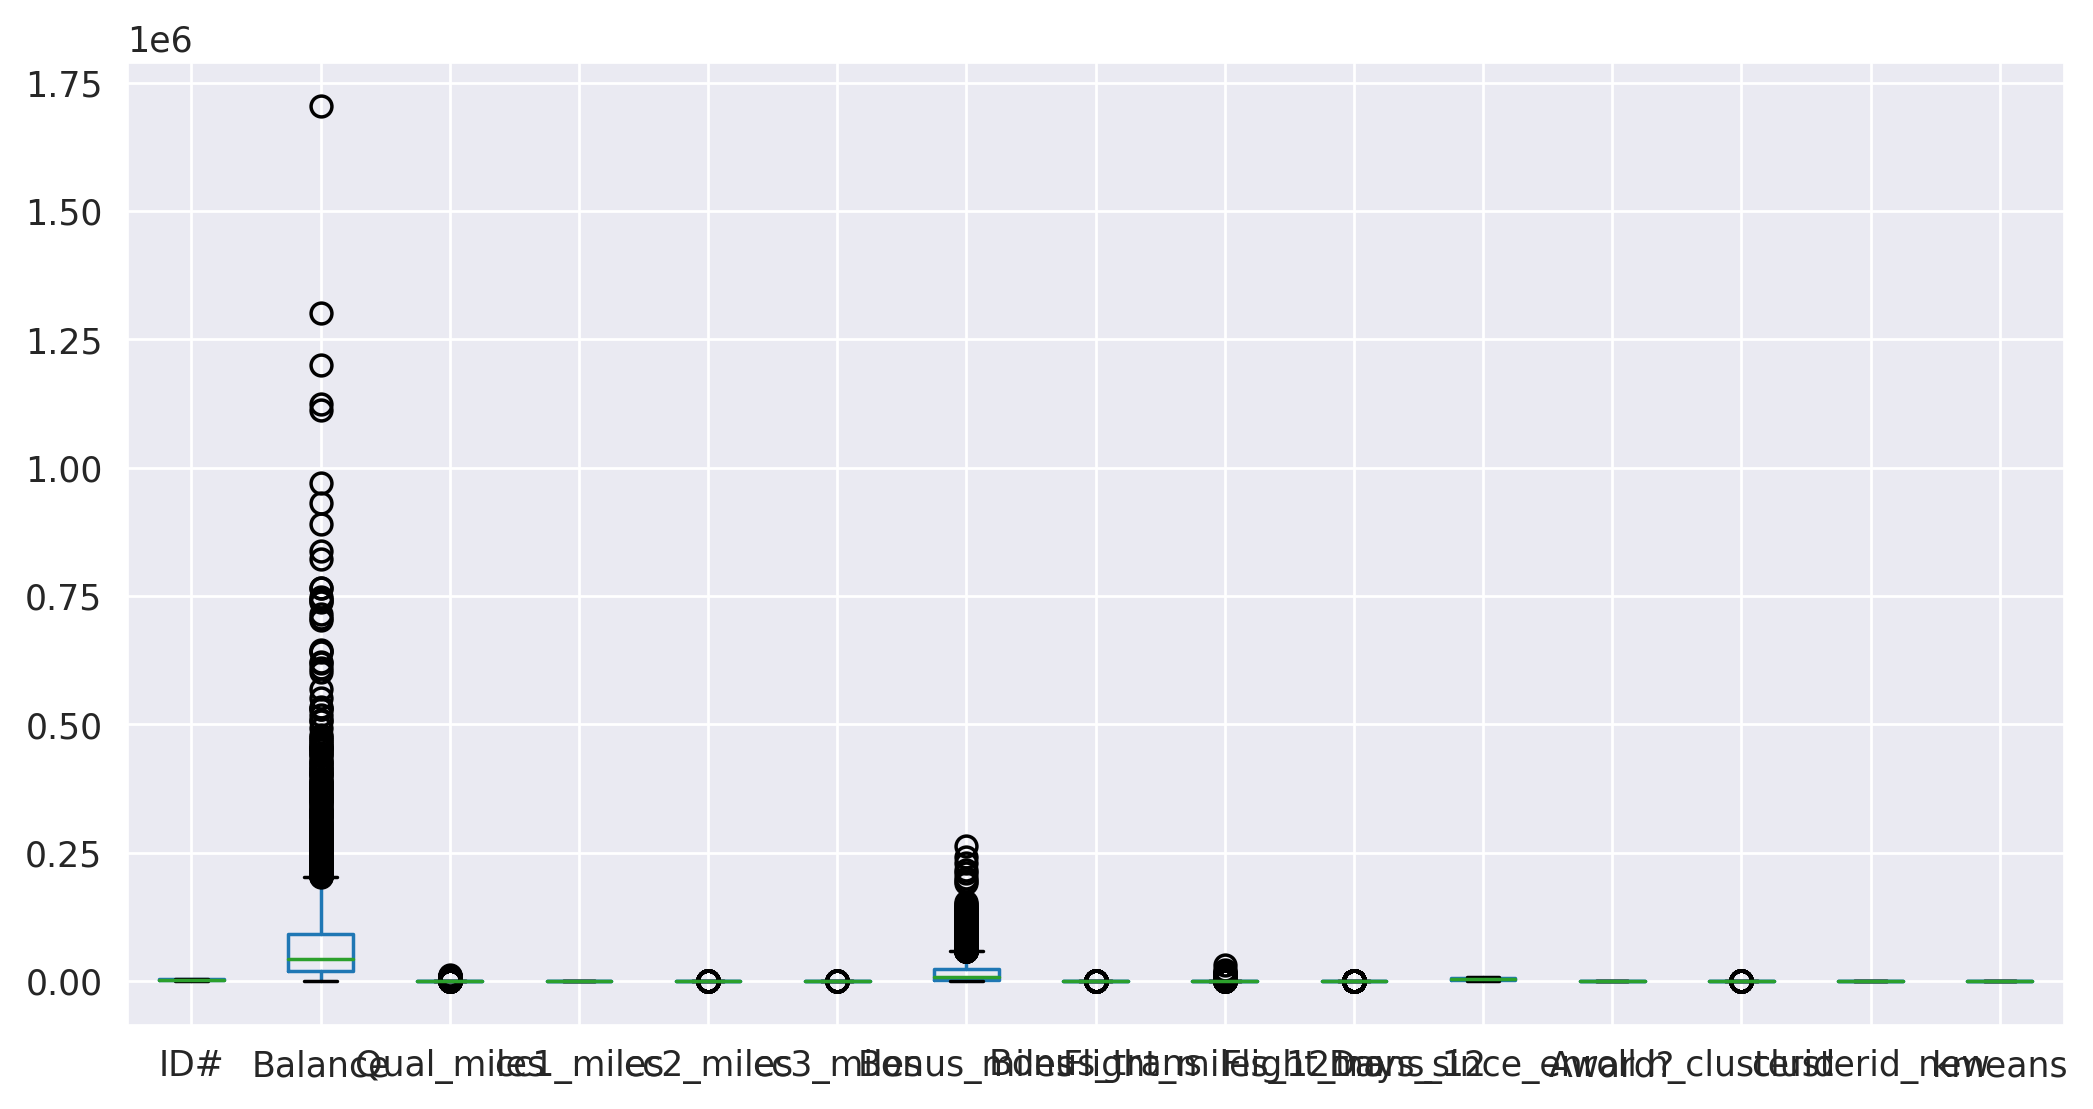

In [37]:
data.boxplot()

In [39]:

from sklearn.cluster import DBSCAN

In [40]:
db = DBSCAN(eps=0.5, min_samples=3) # default eps=0.5
y = db.fit_predict(df)
y

array([0, 0, 0, ..., 6, 0, 0])

In [41]:
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(df,y) # parameters: x:standardized version of data, y:cluster lables
# score is approximately equal or near to zero i.e. clusters are overlapping

-0.03871215703612724

In [44]:
from sklearn.neighbors import NearestNeighbors
# NearestNeighbors will calculate avg distance by considering nearest data point

In [45]:
neighbor = NearestNeighbors(n_neighbors=3).fit(df) # fit will calculate distance using euclidean distance method
# n_neighbors:min sample. Calculate nearest 3 data points of each data point
# eps values will be selected randomly by algorithm

In [46]:
# distances (calculated with eps value) are stored in neighbor
d,index = neighbor.kneighbors(df)
# kneighbors() will show distances.
# It returns 2 values, d:euclidean distances: 3 distances are there in every list as we have selected min sample as 3
# row index: which data point is close to which other data point

In [47]:
neighbor.kneighbors(df)

(array([[0.        , 0.02083256, 0.02425543],
        [0.        , 0.07118577, 0.10509107],
        [0.        , 0.11550979, 0.15373507],
        ...,
        [0.        , 0.12992483, 0.25174092],
        [0.        , 0.14554266, 0.14577144],
        [0.        , 0.00145287, 0.00339003]]),
 array([[   0,  363,  361],
        [   1,   64,    3],
        [   2,  280,  344],
        ...,
        [3996, 3877, 3830],
        [3997, 3882, 3414],
        [3998, 3491, 3492]]))

In [48]:
d

array([[0.        , 0.02083256, 0.02425543],
       [0.        , 0.07118577, 0.10509107],
       [0.        , 0.11550979, 0.15373507],
       ...,
       [0.        , 0.12992483, 0.25174092],
       [0.        , 0.14554266, 0.14577144],
       [0.        , 0.00145287, 0.00339003]])

In [49]:
index

array([[   0,  363,  361],
       [   1,   64,    3],
       [   2,  280,  344],
       ...,
       [3996, 3877, 3830],
       [3997, 3882, 3414],
       [3998, 3491, 3492]])

In [50]:
distance = np.sort(d[:,1]) # consider all rows and 1st nearest neighbor values i.e.2nd column

In [51]:
distance

array([0.        , 0.        , 0.        , ..., 4.95351674, 6.00286597,
       7.38554015])

Text(0.5, 1.0, 'K-Distance Graph')

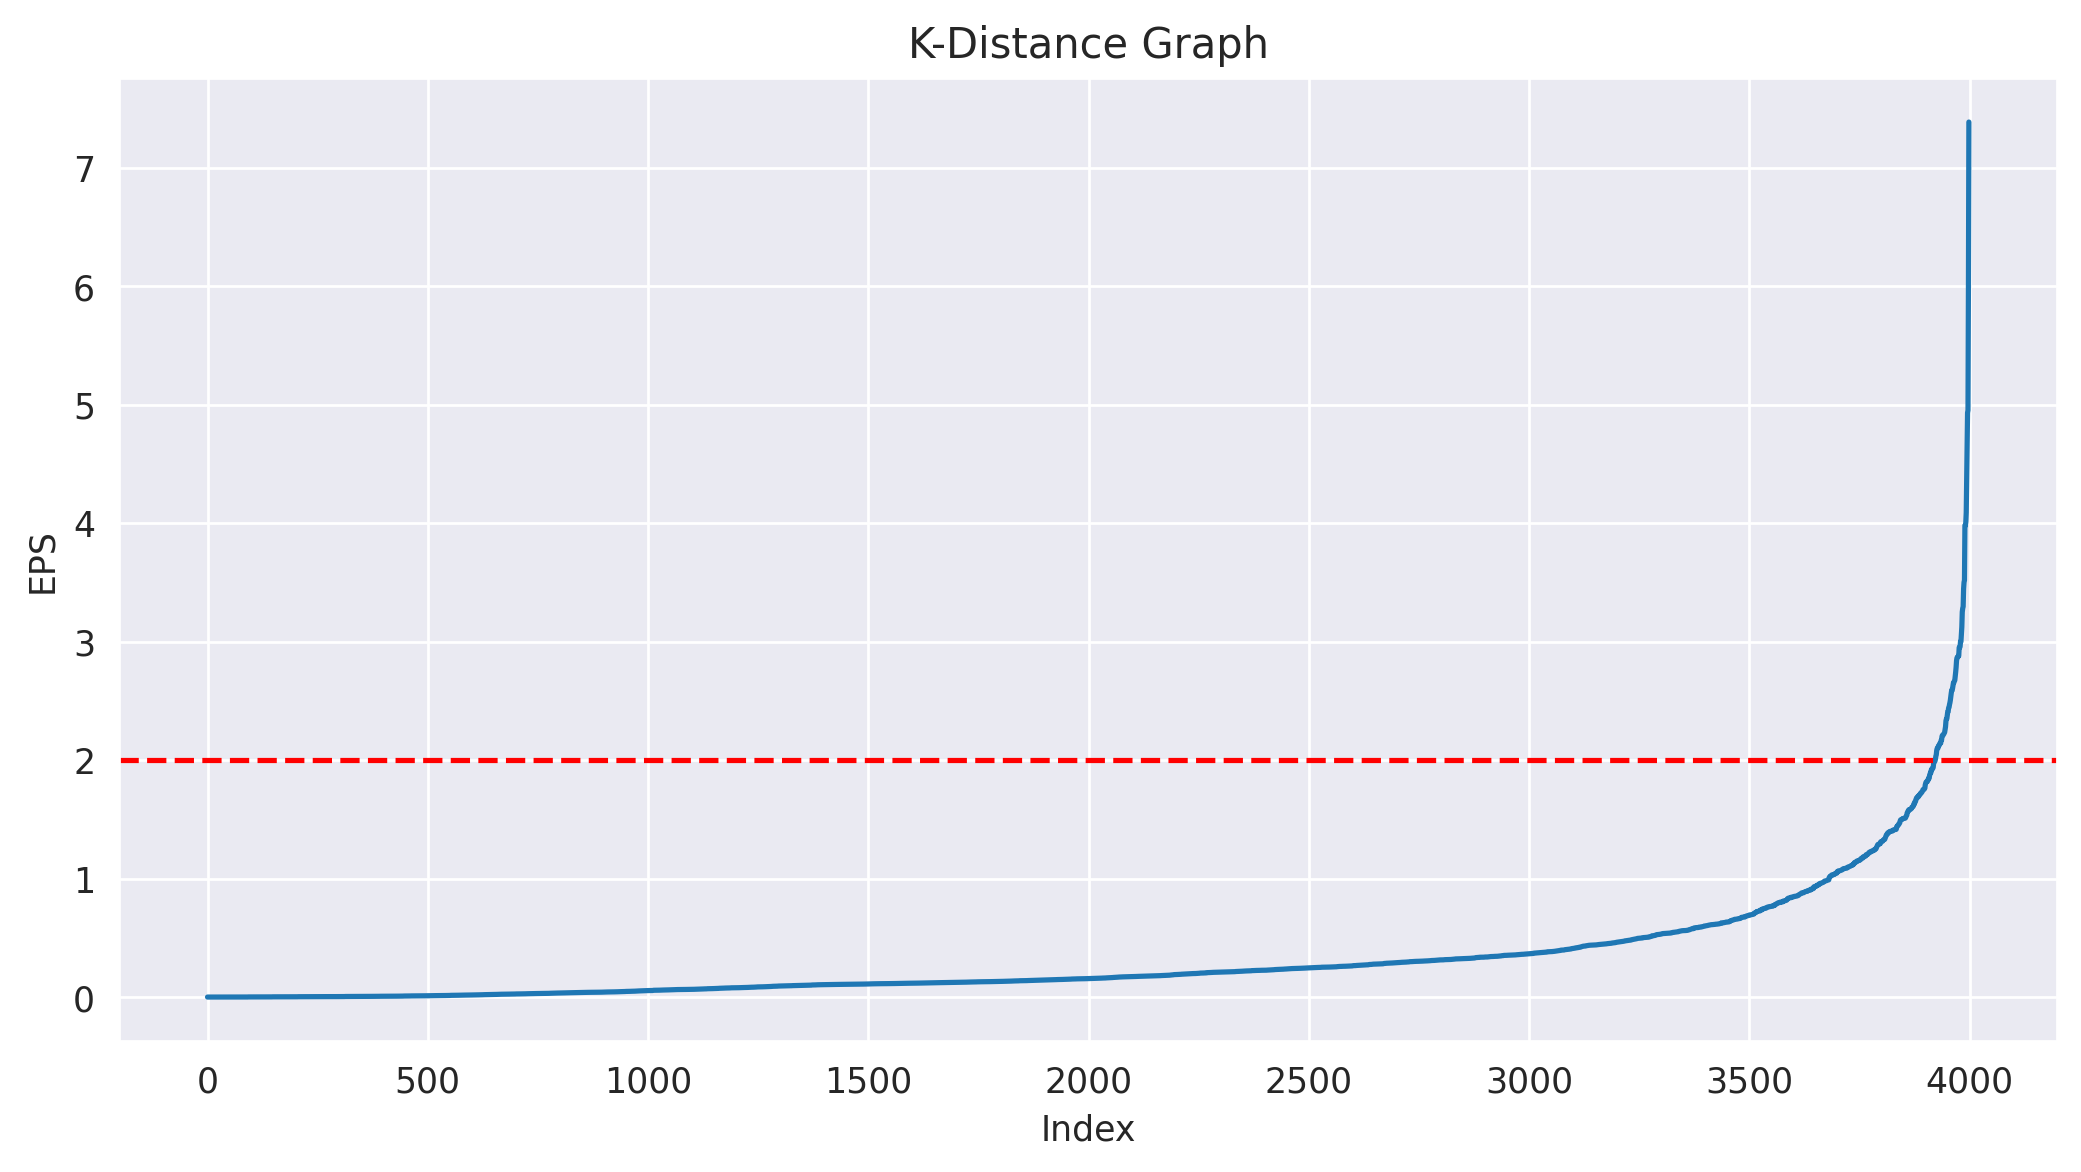

In [52]:
plt.plot(distance)
plt.axhline(y=2, linestyle = '--', color='red') # y=2 means draw horizontal lint at eps=2
plt.xlabel('Index')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [68]:
db1 = DBSCAN(eps=3,min_samples=5) # consider eps=2, try min_samples as 7 or 13 by rule 2 and 3 and check silhouette score
yp1 = db1.fit_predict(df)
yp1
# outliers are reduced, Max clusters:1 i.e. only one cluster: cluster 0

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
silhouette_score(df,yp1) # not good score

0.5606596668391414

In [70]:
db3 = DBSCAN(eps=10,min_samples=7) # consider eps=2, try min_samples as 7 or 13 by rule 2 and 3 and check silhouette score
yp3 = db3.fit_predict(df)
yp3
# outliers are reduced, Max clusters:1 i.e. only one cluster: cluster 0

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
silhouette_score(df,yp3) # good score

0.8635421212194606